# McDonald's Reviews - Exploratory Data Analysis

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from string import punctuation

## Reading in McDonald's reviews

In [9]:
#Reading in McDonald's reviews 
os.chdir(os.getcwd()+ "\\..\\CleanedData")
filepath = 'cleaned_reviews.csv'
mc_df = pd.read_csv(filepath, encoding="latin-1")

In [8]:
mc_df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,why does it look like someone spit on my food ...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,it 'd macdonald . it is what it is as far as t...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made a mobile order get to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,my my . crispy chicken sandwich was Ã¯Â½Ã¯Â½Ã¯...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"i repeat my order 3 time in the drive thru , a...",1 star


In [10]:
mc_df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

## Feature Information

In [10]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33336 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [11]:
mc_df.isna().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review            60
rating             0
dtype: int64

In [36]:
#Dropping NA. Having meaningful reviews, but they are not linked to a sensible location
mc_df.dropna(inplace = True) 
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32676 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    32676 non-null  int64  
 1   store_name     32676 non-null  object 
 2   category       32676 non-null  object 
 3   store_address  32676 non-null  object 
 4   latitude       32676 non-null  float64
 5   longitude      32676 non-null  float64
 6   rating_count   32676 non-null  object 
 7   review_time    32676 non-null  object 
 8   review         32676 non-null  object 
 9   rating         32676 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB


In [12]:
#Location Type - One store removed from NA drop
unique_stores = mc_df.store_address.unique()
print(unique_stores)
len(unique_stores)

['13749 US-183 Hwy, Austin, TX 78750, United States'
 '1698 US-209, Brodheadsville, PA 18322, United States'
 '72-69 Kissena Blvd, Queens, NY 11367, United States'
 '429 7th Ave, New York, NY 10001, United States'
 '724 Broadway, New York, NY 10003, United States'
 '160 Broadway, New York, NY 10038, United States'
 '555 13th St NW, Washington, DC 20004, United States'
 '10451 Santa Monica Blvd, Los Angeles, CA 90025, United States'
 '114 Delancey St, New York, NY 10002, United States'
 '5920 Balboa Ave, San Diego, CA 92111, United States'
 '262 Canal St, New York, NY 10013, United States'
 '490 8th Ave, New York, NY 10001, United States'
 '550 Lawrence Expy, Sunnyvale, CA 94086, United States'
 '11382 US-441, Orlando, FL 32837, United States'
 '210 5th S, Salt Lake City, UT 84106, United States'
 '1916 M St NW, Washington, DC 20036, United States'
 "151 West 34th Street (Macy's 7th Floor, New York, NY 10001, United States"
 '690 Alameda St, Los Angeles, CA 90021, United States'
 '1650 

39

## Data Distribution

In [37]:
# Rating Distribution
temp_df = mc_df.copy()

temp_df['rating'] = temp_df['rating'].str.replace(' star', '')
temp_df['rating'] = temp_df['rating'].str.replace('s', '')
temp_df['rating'] = temp_df['rating'].astype(int)

In [14]:
rating_avg = temp_df['rating'].mean()
rating_median = temp_df['rating'].median()

rating_count = []

for n in range(5):
    rating_count.append([n+1,temp_df['rating'].value_counts()[n+1]])

rating_count_df = pd.DataFrame(rating_count, columns = ["Rating", "Count"])

print("Avg Rating:", rating_avg)
print("Median Rating:", rating_median)
print(rating_count_df)

Avg Rating: 3.13136303748952
Median Rating: 3.0
   Rating  Count
0       1   9431
1       2   3086
2       3   4818
3       4   5787
4       5  10274


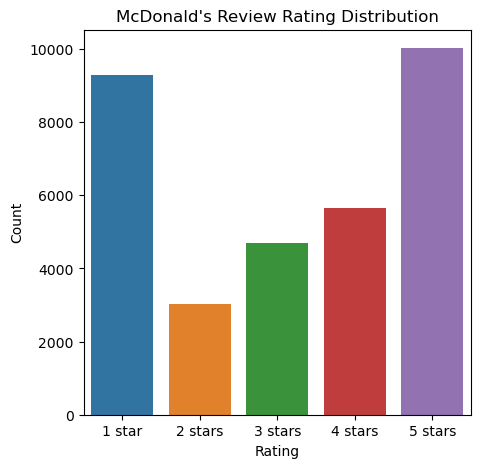

In [15]:
# Rating Distribution

ratings = mc_df['rating']
ratings_count = ratings.value_counts().sort_index()
plt.figure(figsize = (5,5))
sns.barplot(x = ratings_count.index, y = ratings_count.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title("McDonald's Review Rating Distribution", fontsize = 12)
plt.show()

In [25]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

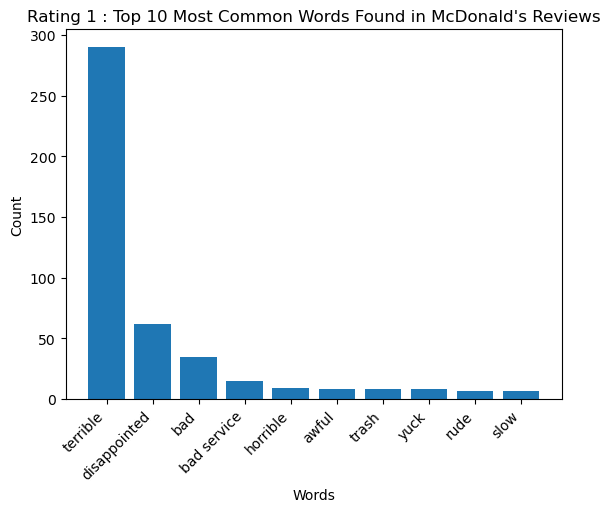

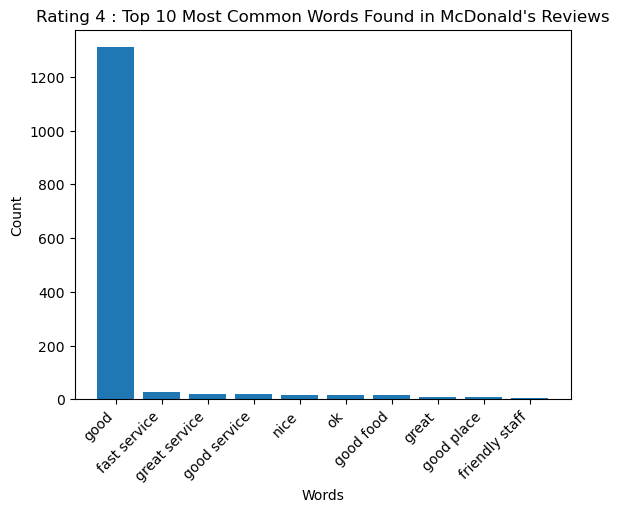

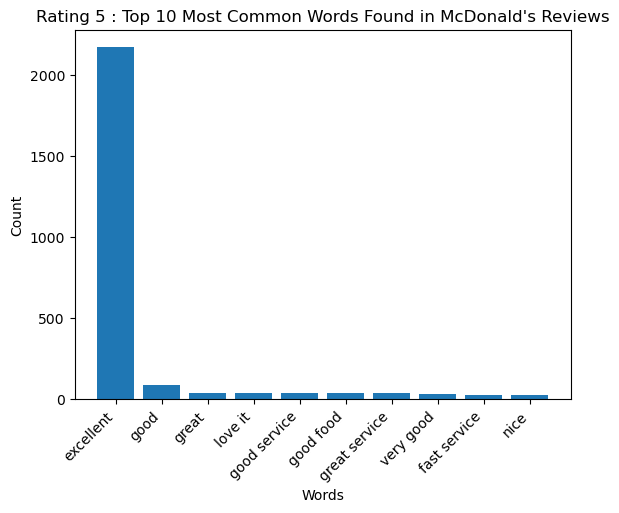

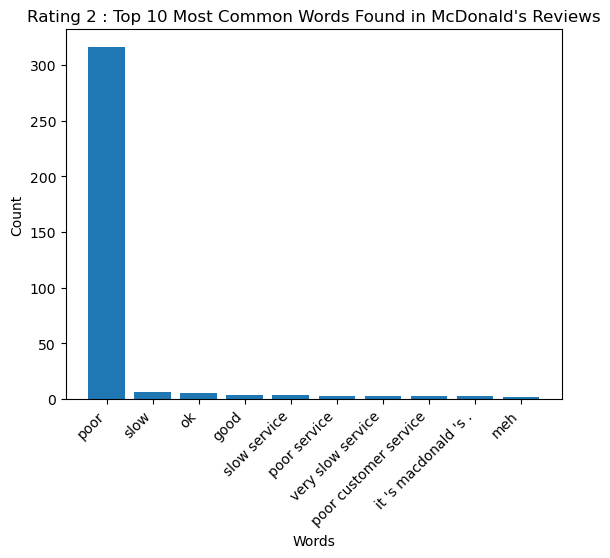

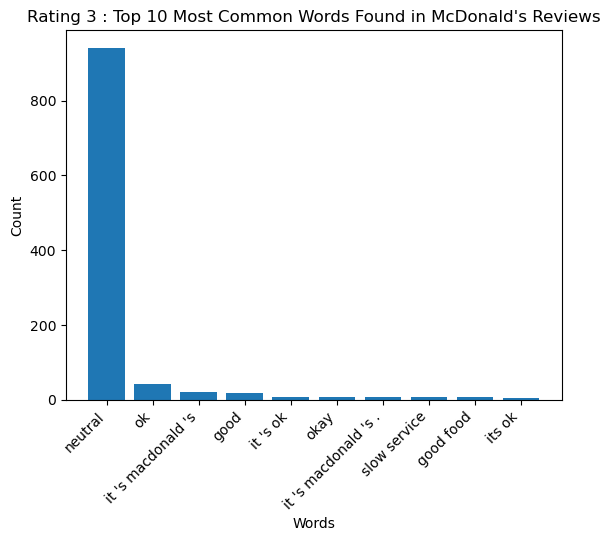

In [39]:
# Word Distribution - rough draft but can be modified with more consise review word dataset
all_words = []
review_groups = {}
for index, row in temp_df.iterrows():
    rating = row['rating']
    if rating not in review_groups:
        review_groups[rating] = []
    else:
        review_groups[rating].append(row['review'])
        
stop_words = set(stopwords.words('english'))
unwanted_words = ["it's macdonald's"]

top_words = {}

for rating, words in review_groups.items(): 
    for word in words:
        word = str(word)
        tokens = nltk.tokenize.word_tokenize(word)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in punctuation and word.lower() not in unwanted_words]
        all_words.extend(tokens)
    word_count = Counter(words)
    top_words[rating] = word_count.most_common(10)
    
    labels = [str(word) for word, count in top_words[rating]]
    counts = [count for word, count in top_words[rating]]
    
    plt.bar(labels, counts)
    # Title
    plt.title(f"Rating {rating} : Top 10 Most Common Words Found in McDonald's Reviews", fontsize = 12)
    # Labels
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [18]:
print(top_words)

{1: [('order', 5009), ('get', 2878), ('food', 2649), ("'s", 2516), ("n't", 2508)], 4: [('order', 5797), ("'s", 3921), ('food', 3835), ('get', 3479), ('service', 3181)], 5: [('order', 6723), ("'s", 5834), ('food', 5720), ('good', 5286), ('service', 5114)], 2: [('order', 7929), ("'s", 6664), ('food', 6610), ('service', 5632), ('good', 5597)], 3: [('order', 8878), ("'s", 8137), ('food', 7722), ('service', 6270), ('good', 6266)]}


In [19]:
# Location Information
locations_ranked_top = temp_df.groupby(['store_address'])['rating'].mean().sort_values(ascending=False)
locations_ranked_top.head(10)

store_address
7010 Bradlick Shopping Center, Annandale, VA 22003, United States          3.695000
429 7th Ave, New York, NY 10001, United States                             3.692172
6875 Sand Lake Rd, Orlando, FL 32819, United States                        3.687755
10451 Santa Monica Blvd, Los Angeles, CA 90025, United States              3.666667
702-2 Haddonfield-Berlin Rd, Voorhees Township, NJ 08043, United States    3.619808
5920 Balboa Ave, San Diego, CA 92111, United States                        3.598182
1916 M St NW, Washington, DC 20036, United States                          3.597345
1415 E State Rd, Fern Park, FL 32730, United States                        3.466981
1100 N US Hwy 377, Roanoke, TX 76262, United States                        3.464439
1698 US-209, Brodheadsville, PA 18322, United States                       3.463035
Name: rating, dtype: float64

In [20]:
locations_ranked_bottom = temp_df.groupby(['store_address'])['rating'].mean().sort_values(ascending=True)
locations_ranked_bottom.head(10)

store_address
151 West 34th Street (Macy's 7th Floor, New York, NY 10001, United States    1.916667
1650 Washington Ave, Miami Beach, FL 33139, United States                    1.971930
160 Broadway, New York, NY 10038, United States                              2.333333
501 W Imperial Hwy, Los Angeles, CA 90044, United States                     2.492723
210 5th S, Salt Lake City, UT 84106, United States                           2.525843
3501 Biscayne Blvd, Miami, FL 33137, United States                           2.553640
9814 International Dr, Orlando, FL 32819, United States                      2.579894
8500 US-290, Austin, TX 78724, United States                                 2.663420
555 13th St NW, Washington, DC 20004, United States                          2.666667
5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States         2.807916
Name: rating, dtype: float64

## Outliers